In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from keras import layers

In [2]:
df = pd.read_csv("C:/AI_study/DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [3]:
df['activity'].value_counts()

ascendingStairs            480
rowing                     480
basketBall                 480
walkingTreadmillFlat       480
crossTrainer               480
jumping                    480
walkingTreadmillIncline    480
runningTreadmill           480
cyclingVertical            480
sitting                    480
decendingStairs            480
movingInElevator           480
standingInElevatorStill    480
stepper                    480
lyingBack                  480
cyclingHorizontal          480
lyingRigh                  480
standing                   480
walkingLot                 480
Name: activity, dtype: int64

In [4]:
df = df.drop('people', axis=1)

In [5]:
# AE 실습을 위해 사용할 세 가지 값만 선택
df_filtered = df[df['activity'].isin(['lyingRigh', 'lyingBack', 'standingInElevatorStill'])]
df_filtered

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.417440,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,lyingBack
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.403720,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,lyingBack
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.426160,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,lyingBack
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.308770,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,lyingBack
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.389000,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,lyingBack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,9.802530,9.8423,9.6857,0.000865,0.029403,-1.341638,-0.185503,-0.090833,-0.25891,0.001316,...,4.094967e-05,0.006399,-0.962316,0.488304,0.51448,0.46222,5.126574e-05,0.007160,-0.717994,standingInElevatorStill
3356,9.799047,9.9038,9.7250,0.000750,0.027379,0.468885,-0.200147,-0.113400,-0.29976,0.001781,...,3.938668e-05,0.006276,-0.513505,0.488314,0.51509,0.46554,4.488257e-05,0.006699,0.136985,standingInElevatorStill
3357,9.797938,9.8537,9.7347,0.000576,0.023998,-0.365021,-0.195523,-0.132300,-0.25615,0.001006,...,3.456590e-05,0.005879,0.691562,0.486659,0.51104,0.46926,4.251657e-05,0.006520,0.178792,standingInElevatorStill
3358,9.606040,9.9302,9.1379,0.067806,0.260396,-0.719145,-0.188162,-0.119480,-0.25154,0.000760,...,6.375183e-05,0.007984,-0.736630,0.490615,0.53319,0.46602,8.602620e-05,0.009275,1.175198,standingInElevatorStill


In [6]:
df_filtered['activity'].value_counts()

standingInElevatorStill    480
lyingRigh                  480
lyingBack                  480
Name: activity, dtype: int64

In [7]:
# 새로운 Class 컬럼 추가
df_filtered['Class'] = 'undefined'  # 우선 기본 값을 설정

# activity가 lyingRigh 또는 lyingBack인 경우 Class를 normal로 설정
df_filtered.loc[df['activity'].isin(['lyingRigh', 'lyingBack']), 'Class'] = 0

# activity가 jumping인 경우 Class를 abnormal로 설정
df_filtered.loc[df['activity'] == 'standingInElevatorStill', 'Class'] = 1

# 기존의 activity 행을 제거해서 df 변경
df = df_filtered.drop('activity', axis=1)

df

C:\Users\User\.conda\envs\test01\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\.conda\envs\test01\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,Class
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.417440,-0.59561,0.001016,...,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301,0
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.403720,-0.63184,0.001297,...,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381,0
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.426160,-0.59561,0.000863,...,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587,0
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.308770,-0.55225,0.003587,...,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321,0
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.389000,-0.53714,0.001059,...,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,9.802530,9.8423,9.6857,0.000865,0.029403,-1.341638,-0.185503,-0.090833,-0.25891,0.001316,...,4.094967e-05,0.006399,-0.962316,0.488304,0.51448,0.46222,5.126574e-05,0.007160,-0.717994,1
3356,9.799047,9.9038,9.7250,0.000750,0.027379,0.468885,-0.200147,-0.113400,-0.29976,0.001781,...,3.938668e-05,0.006276,-0.513505,0.488314,0.51509,0.46554,4.488257e-05,0.006699,0.136985,1
3357,9.797938,9.8537,9.7347,0.000576,0.023998,-0.365021,-0.195523,-0.132300,-0.25615,0.001006,...,3.456590e-05,0.005879,0.691562,0.486659,0.51104,0.46926,4.251657e-05,0.006520,0.178792,1
3358,9.606040,9.9302,9.1379,0.067806,0.260396,-0.719145,-0.188162,-0.119480,-0.25154,0.000760,...,6.375183e-05,0.007984,-0.736630,0.490615,0.53319,0.46602,8.602620e-05,0.009275,1.175198,1


In [8]:
df.shape

(1440, 271)

In [9]:
LABELS = ["Normal", "Abnormal"]

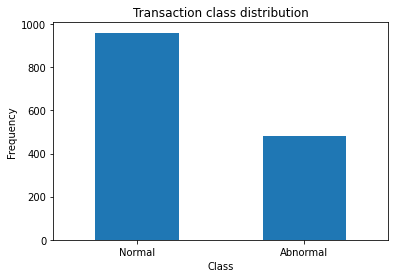

In [10]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [11]:
abnormal = df[df.Class == 1]
normal = df[df.Class == 0]
print(abnormal.shape)
print(normal.shape)

(480, 271)
(960, 271)


In [12]:
RANDOM_SEED = 42

In [13]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(765, 270)

In [14]:
np.random.seed(42)

# Define noise factor (adjustable)
noise_factor = 0.2

# Add noise to X_train
noisy_X_train = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

# Clip the noisy data to prevent large values (optional, if needed)
noisy_X_train = np.clip(noisy_X_train, -1.0, 1.0)

# Now you can use `noisy_X_train` for training

## Symmetrci AE

In [15]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

## Original X_train으로 학습

In [16]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 0s 47ms/step - loss: 5.7618 - val_loss: 5.7091
Epoch 2/50
3/3 [==============================] - 0s 3ms/step - loss: 5.7568 - val_loss: 5.7043
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 5.7502 - val_loss: 5.6969
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 5.7398 - val_loss: 5.6841
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 5.7227 - val_loss: 5.6620
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 5.6955 - val_loss: 5.6280
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 5.6564 - val_loss: 5.5827
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 5.6058 - val_loss: 5.5257
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 5.5434 - val_loss: 5.4577
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 5.4707 - val_loss: 5.3831
Epoch 11/50
3/3 [=====================

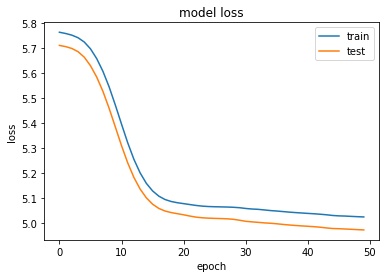

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [18]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error
count,288.000000
mean,5.077077
std,0.319417
min,4.631627
25%,4.813553
50%,5.057905
75%,5.227624
max,6.960427


In [19]:
error_df.head()

,reconstruction_error,true_class
1128,5.324874,0
1565,5.183382,0
1508,5.166743,0
1025,5.491083,0
1588,5.181815,0


In [20]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 5

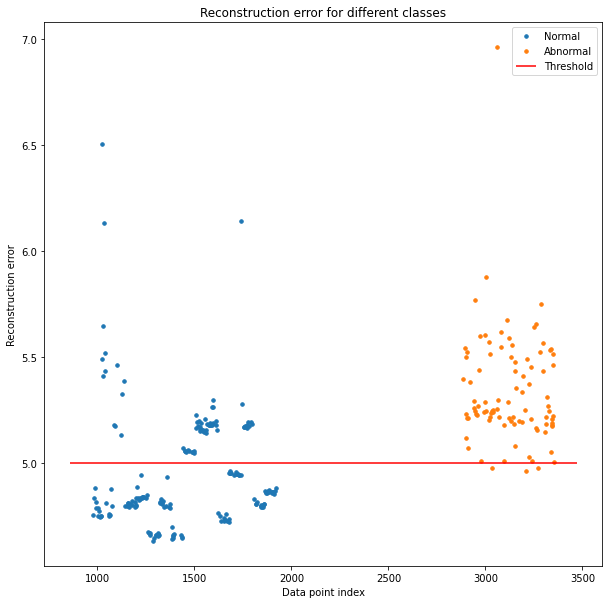

In [21]:
groups = error_df.groupby('true_class')

fig, ax = plt.subplots(figsize=(10, 10))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [22]:
error_df['true_class'] = error_df['true_class'].astype(int)

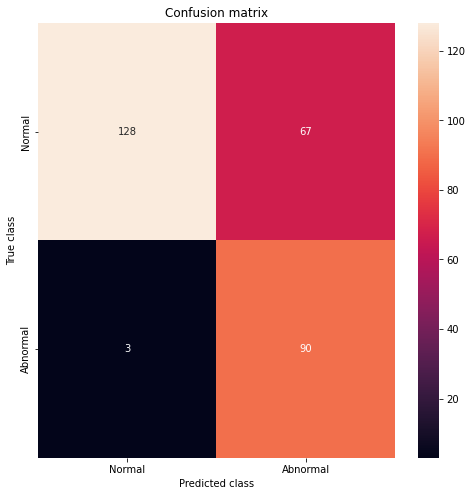

              precision    recall  f1-score   support

           0       0.98      0.66      0.79       195
           1       0.57      0.97      0.72        93

    accuracy                           0.76       288
   macro avg       0.78      0.81      0.75       288
weighted avg       0.85      0.76      0.76       288



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

## symmetric Autoencoder (DAE)

In [24]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 32  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
encoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 8), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 4), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder2 = Model(inputs=input_layer, outputs=decoded)
autoencoder2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

## Noisy_X_train으로 학습

In [25]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder2.fit(noisy_X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 [==============================] - 0s 40ms/step - loss: 5.7618 - val_loss: 5.7088
Epoch 2/50
3/3 [==============================] - 0s 1ms/step - loss: 5.7567 - val_loss: 5.7041
Epoch 3/50
3/3 [==============================] - 0s 1ms/step - loss: 5.7517 - val_loss: 5.6983
Epoch 4/50
3/3 [==============================] - 0s 9ms/step - loss: 5.7452 - val_loss: 5.6907
Epoch 5/50
3/3 [==============================] - 0s 3ms/step - loss: 5.7366 - val_loss: 5.6806
Epoch 6/50
3/3 [==============================] - 0s 8ms/step - loss: 5.7251 - val_loss: 5.6672
Epoch 7/50
3/3 [==============================] - 0s 8ms/step - loss: 5.7101 - val_loss: 5.6498
Epoch 8/50
3/3 [==============================] - 0s 8ms/step - loss: 5.6906 - val_loss: 5.6276
Epoch 9/50
3/3 [==============================] - 0s 8ms/step - loss: 5.6657 - val_loss: 5.5996
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 5.6348 - val_loss: 5.5650
Epoch 11/50
3/3 [=====================

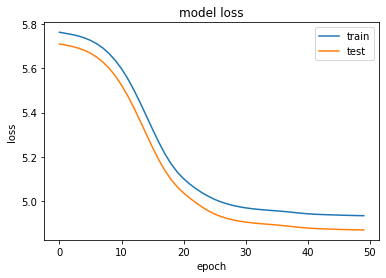

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [27]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder2.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error
count,288.000000
mean,5.029905
std,0.362624
min,4.521484
25%,4.693635
50%,5.054204
75%,5.240097
max,6.963011


In [28]:
error_df.head()

,reconstruction_error,true_class
1128,5.007492,0
1565,5.139457,0
1508,5.180210,0
1025,5.485335,0
1588,5.139757,0


In [29]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 5

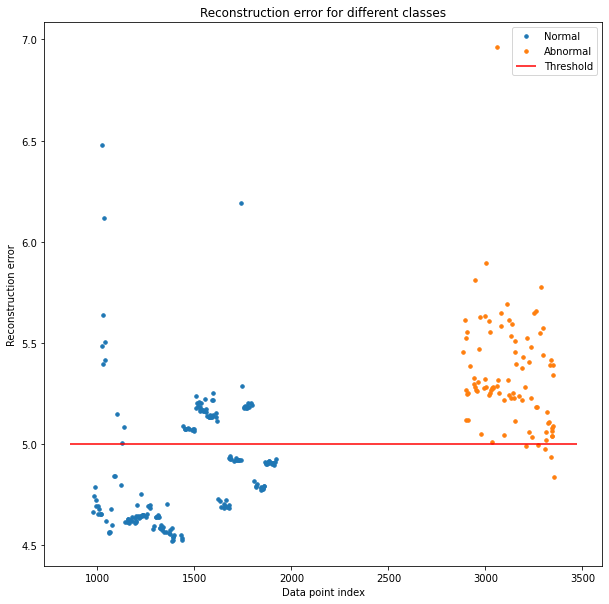

In [30]:
groups = error_df.groupby('true_class')

fig, ax = plt.subplots(figsize=(10, 10))

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [31]:
error_df['true_class'] = error_df['true_class'].astype(int)

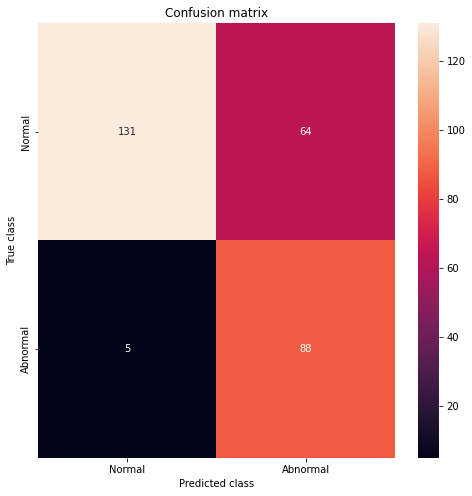

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       195
           1       0.58      0.95      0.72        93

    accuracy                           0.76       288
   macro avg       0.77      0.81      0.75       288
weighted avg       0.84      0.76      0.77       288



In [32]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))